```{contents}
```

# AdaBoost Classifier

* **AdaBoost (Adaptive Boosting)** is an **ensemble learning method** that combines many **weak classifiers** (usually decision stumps = trees of depth 1) to build a **strong classifier**.
* The key idea: **Focus more on misclassified points** in each round by adjusting sample weights.
* Works well on tabular datasets, robust to overfitting if tuned properly.

---

## How AdaBoost Classifier Works (Intuition)

1. **Start with equal weights**

   * Each sample is given the same importance (weight = 1/N).

2. **Train a weak learner**

   * Example: a decision stump (one-split tree).
   * Find the split that minimizes classification error (weighted error).

3. **Evaluate performance of weak learner**

   * Weighted error:

     $$
     \epsilon = \frac{\sum w_i \cdot I(y_i \neq h(x_i))}{\sum w_i}
     $$
   * If error > 0.5, the stump is discarded.

4. **Assign weight to the weak learner**

   * Performance score:

     $$
     \alpha = \frac{1}{2} \ln\left(\frac{1 - \epsilon}{\epsilon}\right)
     $$
   * Better learners get **higher α** (more influence).

5. **Update sample weights**

   * Misclassified samples get **higher weights** → the next weak learner will focus more on them.
   * Correctly classified samples get lower weights.

6. **Repeat steps 2–5 for multiple rounds.**

7. **Final prediction**

   * Weighted majority vote of all weak learners:

     $$
     H(x) = \text{sign}\left(\sum_{m=1}^M \alpha_m \cdot h_m(x)\right)
     $$

---

## **Geometric Intuition**

* Imagine a dataset that’s not perfectly separable with a line.
* Each weak learner (stump) draws a simple vertical/horizontal split.
* AdaBoost sequentially **bends the decision boundary** by combining stumps, correcting mistakes iteratively.
* End result: a **non-linear decision boundary** that fits the dataset much better than any single stump.

---

## **Key Hyperparameters**

1. **`n_estimators`** → number of weak learners (default 50).

   * Too few → underfit.
   * Too many → risk overfit.

2. **`learning_rate`** → shrinks each weak learner’s weight contribution.

   * Low value (e.g., 0.1) → slower but more stable learning.
   * High value (e.g., 1.0) → faster but risk overfit.

3. **`estimator`** → base model (default: DecisionTreeClassifier(max\_depth=1)).

   * Can increase depth for more complex patterns.

---

## **Performance Metrics**

Since it’s a **classifier**, evaluation uses:

* **Accuracy** → overall correct predictions.
* **Precision, Recall, F1** → for imbalanced classes.
* **ROC-AUC** → probability-based ranking of predictions.
* **Log Loss** → penalizes overconfident wrong predictions.

---

## **Advantages**

✅ Works well with simple weak learners (stumps).
✅ Reduces bias significantly.
✅ Handles non-linear data.
✅ Robust against overfitting if tuned properly.

## **Limitations**

❌ Sensitive to noisy data & outliers (because they get high weights).
❌ Can be slower than Random Forest when `n_estimators` is large.

---

**In short:** AdaBoost Classifier = sequentially trained weak classifiers (stumps) + reweighting misclassified points → strong ensemble that produces non-linear decision boundaries.

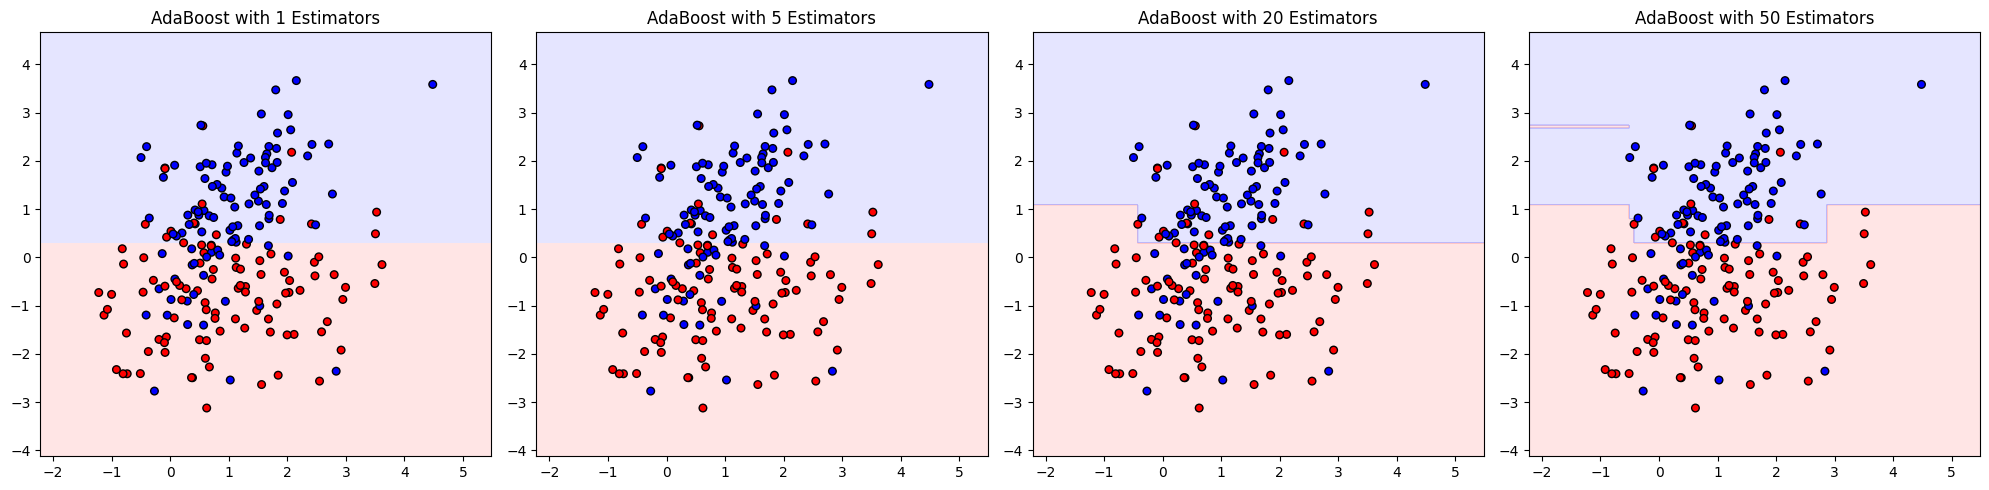

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# Generate toy dataset (2 features for visualization)
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, random_state=42
)

# Create weak learner (Decision Stump)
stump = DecisionTreeClassifier(max_depth=1)

# Train AdaBoost with increasing estimators
estimators_list = [1, 5, 20, 50]
models = [AdaBoostClassifier(estimator=stump, n_estimators=n, random_state=42).fit(X, y)
          for n in estimators_list]

# Create mesh for decision boundary plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Plot decision boundaries
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, model, n in zip(axes, models, estimators_list):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor="k", s=30)
    ax.set_title(f"AdaBoost with {n} Estimators")

plt.tight_layout()
plt.show()